# Task-3
# REsnet5, pretrained weights of imageNet,TransferLearning 

In [1]:
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.applications import ResNet50
import numpy as np

2024-03-13 22:47:24.489146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 22:47:24.489270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 22:47:24.635799: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dataset = os.listdir('/kaggle/input/dfdataset1/train')
valid_dataset=os.listdir('/kaggle/input/dfdataset1/validation')
#test_dataset=os.listdir('/kaggle/input/dfdataset1/test')
TestDir = '/kaggle/input/dfdataset1/test'


# train_dataset = os.listdir('/kaggle/input/df-complcropdata/Df_DividedData/task1/train')
# valid_dataset=os.listdir('/kaggle/input/df-complcropdata/Df_DividedData/task1/validation')
# test_dataset=os.listdir('/kaggle/input/df-complcropdata/')



print("total Train_classTypes of digits: ", len(train_dataset))
print("total Valid_classTypes of digits: ", len(valid_dataset))

print ("Train--",train_dataset)  #what kinds of digits are in this dataset
print ("Valid--",valid_dataset)  #what kinds of digits are in this dataset


total Train_classTypes of digits:  2
total Valid_classTypes of digits:  2
Train-- ['fake', 'real']
Valid-- ['fake', 'real']


In [3]:
TrainDir = '/kaggle/input/dfdataset1/train'
ValidDir = '/kaggle/input/dfdataset1/validation'
TestDir = '/kaggle/input/dfdataset1/test'

batch_size = 32


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    shear_range=0.1,  # set range for random shear
    zoom_range=0.1,  # set range for random zoom
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False,  # randomly flip images vertically
    fill_mode='nearest'  # fill mode for filling in newly created pixels
)

# Generate augmented data for train_ds
augmented_train_ds = datagen.flow_from_directory(
    TrainDir,
    target_size=(256, 256),
    batch_size=batch_size,
    seed=123,
    shuffle=True,  # shuffle the data
    class_mode='categorical'  # categorical labels
)


Found 444 images belonging to 2 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    ValidDir,
    seed=123,
    image_size=(256, 256),
    batch_size=batch_size,
    #validation_split=0.2,  # Split 20% of the data for validation
    #subset="validation",
    label_mode="categorical"  # Convert labels to one-hot encoded format
)


test_datagen = ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_directory(
    TestDir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 112 files belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [8]:

input_shape = (256, 256, 3)  # 

#class_names = augmented_train_ds.class_names
class_names = augmented_train_ds.class_indices

resnet_model = Sequential()

# Load pre-trained ResNet50 model
pretrained_model = ResNet50(
    include_top=False,
    input_shape=input_shape,  # Adjusted input shape for grayscale images
    pooling='max',
    weights='imagenet'
)

# Add the ResNet50 model to your Sequential model
resnet_model.add(pretrained_model)

# Add a Flatten layer to convert 3D output of ResNet50 to 1D for Dense layer
resnet_model.add(Flatten())

# Add a Dense layer for classification
resnet_model.add(Dense(2, activation='softmax'))  # here we have fake and real classes

# Build the model to ensure it's fully constructed
resnet_model.build((None, *input_shape))

# Compile the model
#resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Compile the model
#resnet_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=10,
    #patience=5,
    verbose=1,
    mode="auto",
    #restore_best_weight=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=2,
    verbose=0,
    mode="min",
    min_delta=0.01,
    min_lr=0
)


# checkpoint = ModelCheckpoint(
#     "best_model_weights.h5",
#     monitor="val_loss",
#     save_best_only=True,
#     mode="min",
#     verbose=1
# )




In [10]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 23,538,690 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [12]:
epochs =40
history = resnet_model.fit(
    augmented_train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stop, reduce_lr]
    
    #callbacks=[early_stop, reduce_lr, checkpoint]
)
#augmented_train_ds

# Save the trained model
#resnet_model.save("trained_model1.h5")



Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1710370449.328308     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710370449.423762     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7727 - loss: 3.0052

W0000 00:00:1710370491.157013     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.7801 - loss: 2.9140 - val_accuracy: 0.5089 - val_loss: 477.8989 - learning_rate: 0.0010
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/step - accuracy: 0.9138 - loss: 1.9745 - val_accuracy: 0.3661 - val_loss: 967.7637 - learning_rate: 0.0010
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.9268 - loss: 0.7417 - val_accuracy: 0.5625 - val_loss: 2112.5544 - learning_rate: 0.0010
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/step - accuracy: 0.9703 - loss: 0.0957 - val_accuracy: 0.5446 - val_loss: 654.3657 - learning_rate: 1.0000e-04
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - accuracy: 0.9838 - loss: 0.0638 - val_accuracy: 0.5536 - val_loss: 245.9592 - learning_rate: 1.0000e-04
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.9810 - loss: 0.0722 - val_accuracy: 0.6875 - val_loss: 57.7129 - learning_rate: 1.0000e-04
Epoch 7/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 356ms/step - accuracy: 0.9776 - los

In [14]:
# Evaluate model on test dataset
test_loss, test_accuracy = resnet_model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.5021 - loss: 1.3888
Test Loss: 1.4067093133926392
Test Accuracy: 0.5


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

W0000 00:00:1710370882.745830     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step 


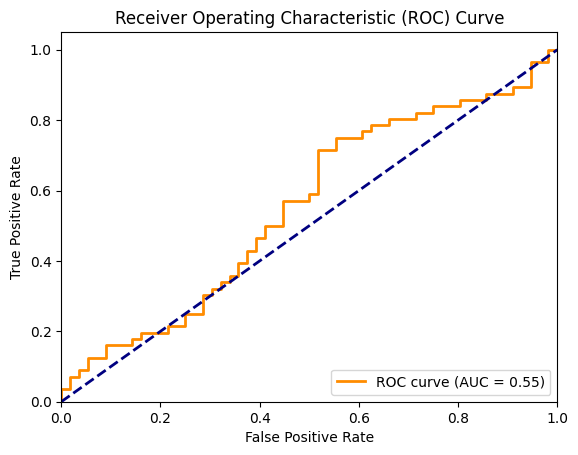

AUC Score: 0.5542091836734693


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Make predictions on the test dataset
test_predictions = resnet_model.predict(test_ds)

# Extract true labels and predicted probabilities for the positive class
test_true_labels = test_ds.classes
test_predicted_probs = test_predictions[:, 1]  # assuming the positive class is index 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_true_labels, test_predicted_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display AUC score
print("AUC Score:", roc_auc)
